## The Sparks Foundation: Graduate Rotational Internship Program

#### Presenter: Tanusha Gupta

#### Date: 10/07/2021

# Explorartory Data Analysis Project - Retail

## Introduction

A supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections. This kind of store is larger and has a wider selection than earlier grocery stores, but is smaller and more limited in the range of merchandise than a hypermarket or big-box market. In everyday usage, however,* "grocery store"* is synonymous with supermarket, and is not used to refer to other types of stores that sell groceries.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/kMwMyk6/super.jpg" alt="super" border="0"></a><br /><a target='_blank' href='https://the-crosswordsolver.com/genuine-in-germany-4-letters'></a><br />

----
### IMPORTING LIBRARIES¶
List of all the python libraries that are required:

- Library `pandas` will be required to work with data in tabular representation.
- Library `numpy` will be required to round the data in the correlation matrix.
- Library `warning` will be required to ignore all warnings.
- Library `matplotlib`, `seaborn`, `plotly` required for data visualization.

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore")

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsf-datasets/student_scores.csv
/kaggle/input/tsf-datasets/matches.csv
/kaggle/input/tsf-datasets/deliveries.csv
/kaggle/input/tsf-datasets/globalterrorismdb_0718dist.csv
/kaggle/input/tsf-datasets/india-news-headlines.csv
/kaggle/input/tsf-datasets/SampleSuperstore.csv
/kaggle/input/tsf-datasets/Iris.csv


In [2]:
df = pd.read_csv('/kaggle/input/tsf-datasets/SampleSuperstore.csv')
print('Data loaded successfully.')

Data loaded successfully.


----
Now the dataset is loaded, we will now understand the dataset.

----

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print('Shape of our dataframe is :' +str(df.shape))

Shape of our dataframe is :(9994, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

----
Dataframe has no NaN values. Lets look at its statistical view. using `describe()`

----

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [9]:
df.duplicated().sum()

17

----
The dataframe have 17 dupplicates values. Lets remove them first using `drop_duplicates()`

----

In [10]:
df.drop_duplicates(inplace= True)

In [11]:
df.shape

(9977, 13)

----
Shape has been reduced to `(9977,13)`.

Now we will check number of unique values for every column using `value_counts()`

---

In [12]:
dict = {}
for x in list(df.columns):
    dict[x] = df[x].value_counts().shape[0]

pd.DataFrame(dict, index=["Unique Counts"]).transpose()

,Unique Counts
Ship Mode,4
Segment,3
Country,1
City,531
State,49
Postal Code,631
Region,4
Category,3
Sub-Category,17
Sales,5825


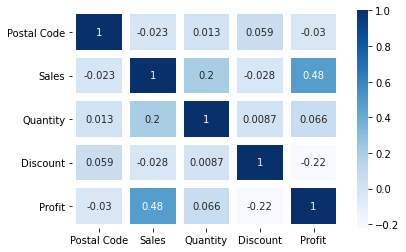

In [13]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', lw = 8, linecolor = 'white');

----
#### **Analysis:**
We can notice `sales` is fairly related to `profit` and `discount` is negatively related to `profit`.

**Intrepreted as**  higher sales and lesser discounts leads to `more profit`.

It is also noticable that `postal code` has nothing to do with overall `profit`

---

## **Univariate Analysis**

Since univariate analysis deal with one variable at a time, we will check frequency of most of the columns, using `subplots`.

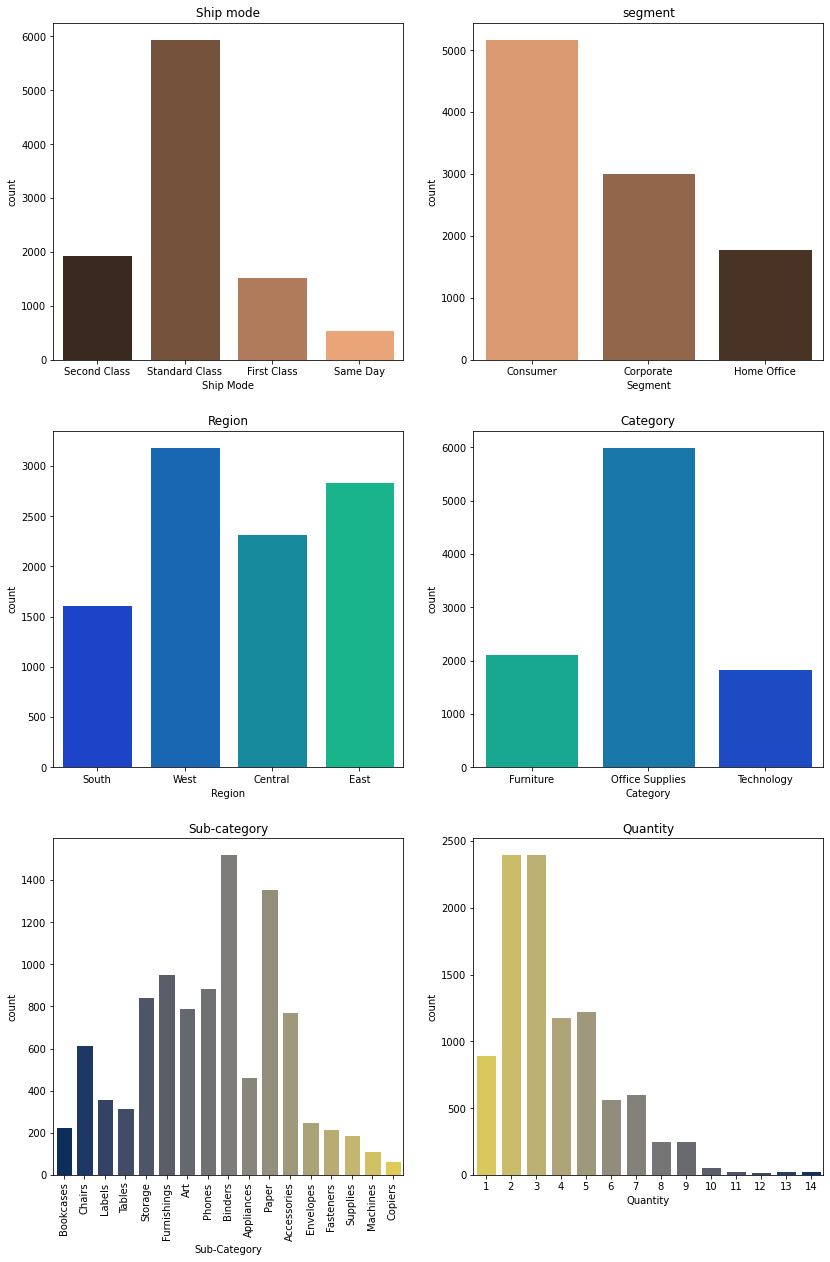

In [14]:
fig, axes = plt.subplots(3,2, figsize = (12,18))
sns.set_theme(style="darkgrid")
axes[0,0].set_title("Ship mode")
axes[0,1].set_title("segment")
axes[1,0].set_title("Region")
axes[1,1].set_title("Category")
axes[2,0].set_title("Sub-category")
axes[2,1].set_title("Quantity")

sns.countplot(x=df['Ship Mode'],
              palette = 'copper',
              orient='h',
              ax=axes[0,0])

sns.countplot(x=df['Segment'],
              palette = 'copper_r',
              orient='h',
              ax=axes[0,1])

sns.countplot(x=df['Region'],
              palette = 'winter',
              orient='h',
              ax=axes[1,0])

sns.countplot(x=df['Category'],
              palette = 'winter_r',
              orient='h',
              ax=axes[1,1])

sns.countplot(x=df['Sub-Category'],
              palette = 'cividis',
              orient='h',
              ax=axes[2,0])

sns.countplot(x=df['Quantity'],
              palette = 'cividis_r',
              orient='h',
              ax=axes[2,1])

axes[2,0].set_xticklabels(list(df['Sub-Category'].unique()), rotation=90)

plt.tight_layout(pad=2);

---
#### **Analysis:**

* `Standard class` ship-mode is more preferred.
* `Consumer` is the majority segment.
* Superstores are more in `west` and least in `south`
* In category-wise, `office supplies` holds the majority.
* Top-selling sub-categories are `binders`, `paper`.
* Prople mostly go for 2 or 3 `quanitites`.

---

## **Bivariate Analysis**

We will be comparing other features to `profit`, `sales` and `quantities` to get a visual idea about what affects the profit most.

## 1. Ship-Mode

In [15]:
ship_df = pd.DataFrame(df.groupby(['Ship Mode'])[['Profit','Sales', 'Quantity']].sum())
ship_df

,Profit,Sales,Quantity
Ship Mode,,,
First Class,48953.6561,3.513805e+05,5690
Same Day,15871.8869,1.283217e+05,1956
Second Class,57446.6516,4.591770e+05,7418
Standard Class,163969.2280,1.357316e+06,22756


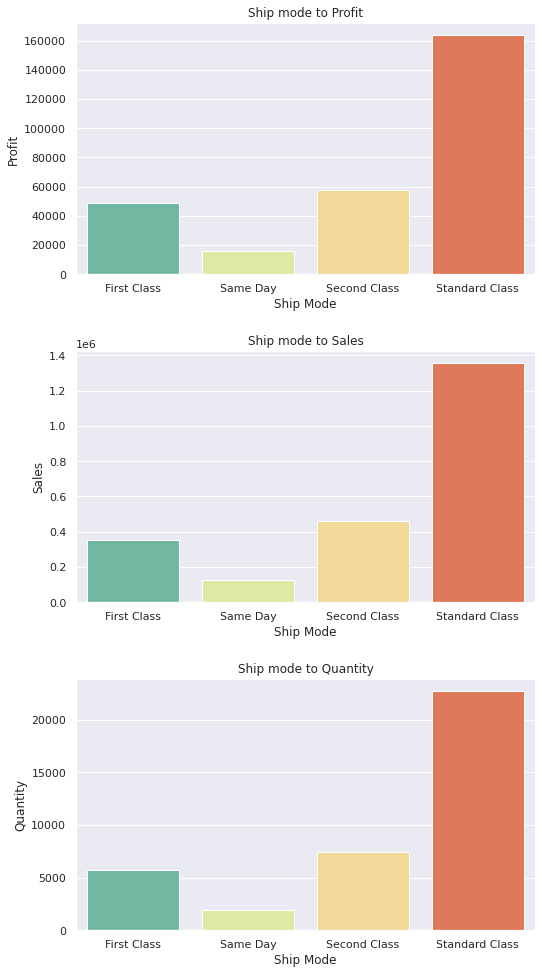

In [16]:
fig, axes = plt.subplots(3,1, figsize=(8,14))
sns.set_theme(style="darkgrid")
axes[0].set_title("Ship mode to Profit")
axes[1].set_title("Ship mode to Sales")
axes[2].set_title("Ship mode to Quantity")

sns.barplot(x=ship_df.index,
           y=ship_df['Profit'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[0]);

sns.barplot(x=ship_df.index,
           y=ship_df['Sales'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[1]);

sns.barplot(x=ship_df.index,
           y=ship_df['Quantity'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[2])

plt.tight_layout(pad=2);

---
**Analysis:**

`Standard class` ship-mode is more preferred. Maybe it is cheap and efficient.

---

## 2. Segment

In [17]:
segment_df = pd.DataFrame(df.groupby(['Segment'])[['Profit', 'Sales', 'Quantity']].sum())
segment_df

,Profit,Sales,Quantity
Segment,,,
Consumer,134007.4413,1.160833e+06,19497
Corporate,91954.9798,7.060701e+05,11591
Home Office,60279.0015,4.292927e+05,6732


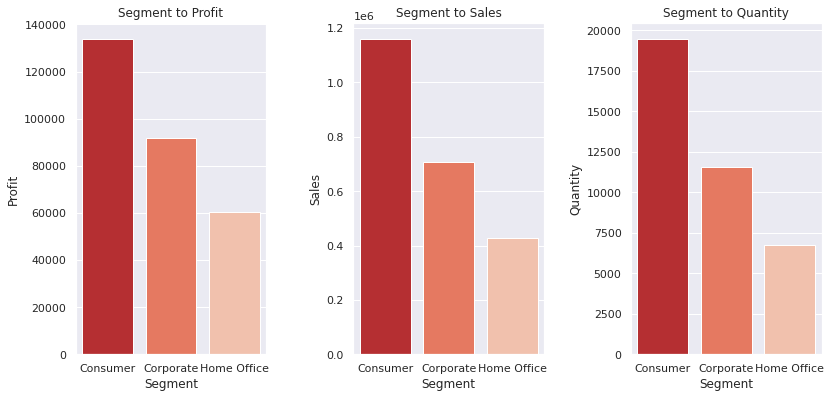

In [18]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.set_theme(style="darkgrid")
axes[0].set_title("Segment to Profit")
axes[1].set_title("Segment to Sales")
axes[2].set_title("Segment to Quantity")

sns.barplot(x=segment_df.index,
           y=segment_df['Profit'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[0])

sns.barplot(x=segment_df.index,
           y=segment_df['Sales'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[1])

sns.barplot(x=segment_df.index,
           y=segment_df['Quantity'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[2])

plt.tight_layout(pad=2);

---
**Analysis:**

`Consumer` segment is most profitable, followed by Corporate Segment and home offices. Hence, marketing strategy has to target or place more focus on retaining `consumers`.

---

## 3. Region

In [19]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Profit', 'Sales', 'Quantity']].sum())
region_df

,Profit,Sales,Quantity
Region,,,
Central,39655.8752,500782.8528,8768
East,91506.3092,678435.1960,10609
South,46749.4303,391721.9050,6209
West,108329.8079,725255.6365,12234


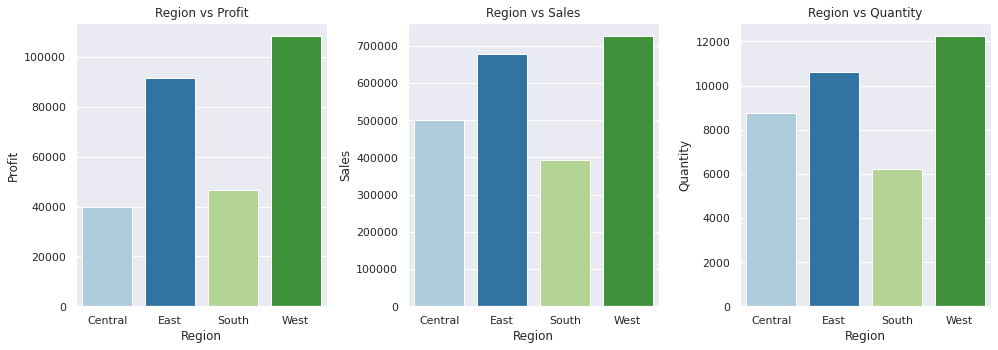

In [20]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Region vs Profit")
axes[1].set_title("Region vs Sales")
axes[2].set_title("Region vs Quantity")

sns.barplot(x=region_df.index,
           y='Profit',
           data=region_df,
           palette='Paired',
           ax=axes[0])

sns.barplot(x=region_df.index,
           y='Sales',
           data=region_df,
           palette='Paired',
           ax=axes[1])

sns.barplot(x=region_df.index,
           y='Quantity',
           data=region_df,
           palette='Paired',
           ax=axes[2])

plt.tight_layout(pad=1);

---
**Analysis:**

Among every region, west and east region recorded more profit. So, strategy should focus more on `east` and `west` region.

---

## 4. Category

In [21]:
category_df = pd.DataFrame(df.groupby(['Category'])[['Profit', 'Sales', 'Quantity']].sum())
category_df

,Profit,Sales,Quantity
Category,,,
Furniture,18421.8137,741306.3133,8020
Office Supplies,122364.6608,718735.2440,22861
Technology,145454.9481,836154.0330,6939


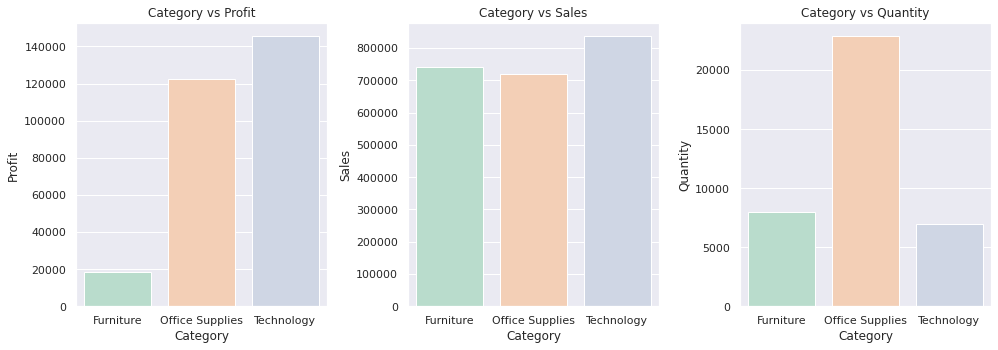

In [22]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Category vs Profit")
axes[1].set_title("Category vs Sales")
axes[2].set_title("Category vs Quantity")

sns.barplot(x=category_df.index,
           y='Profit',
           data=category_df,
           palette='Pastel2',
           ax=axes[0])

sns.barplot(x=category_df.index,
           y='Sales',
           data=category_df,
           palette='Pastel2',
           ax=axes[1])

sns.barplot(x=category_df.index,
           y='Quantity',
           data=category_df,
           palette='Pastel2',
           ax=axes[2])

plt.tight_layout(pad=1);

---
**Analysis:**

Though quantity is less, `technology` seems to have highest sales as well as profit. For more profit, focus should be more on technology.

---

## 5. Sub-Category

In [23]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Profit', 'Sales', 'Quantity']].sum())
sub_category_df

,Profit,Sales,Quantity
Sub-Category,,,
Accessories,41936.6357,167380.3180,2976
Appliances,18138.0054,107532.1610,1729
Art,6524.6118,27107.0320,2996
Binders,30228.0003,203409.1690,5971
Bookcases,-3472.5560,114879.9963,868
Chairs,26567.1278,327777.7610,2351
Copiers,55617.8249,149528.0300,234
Envelopes,6964.1767,16476.4020,906
Fasteners,949.5182,3024.2800,914


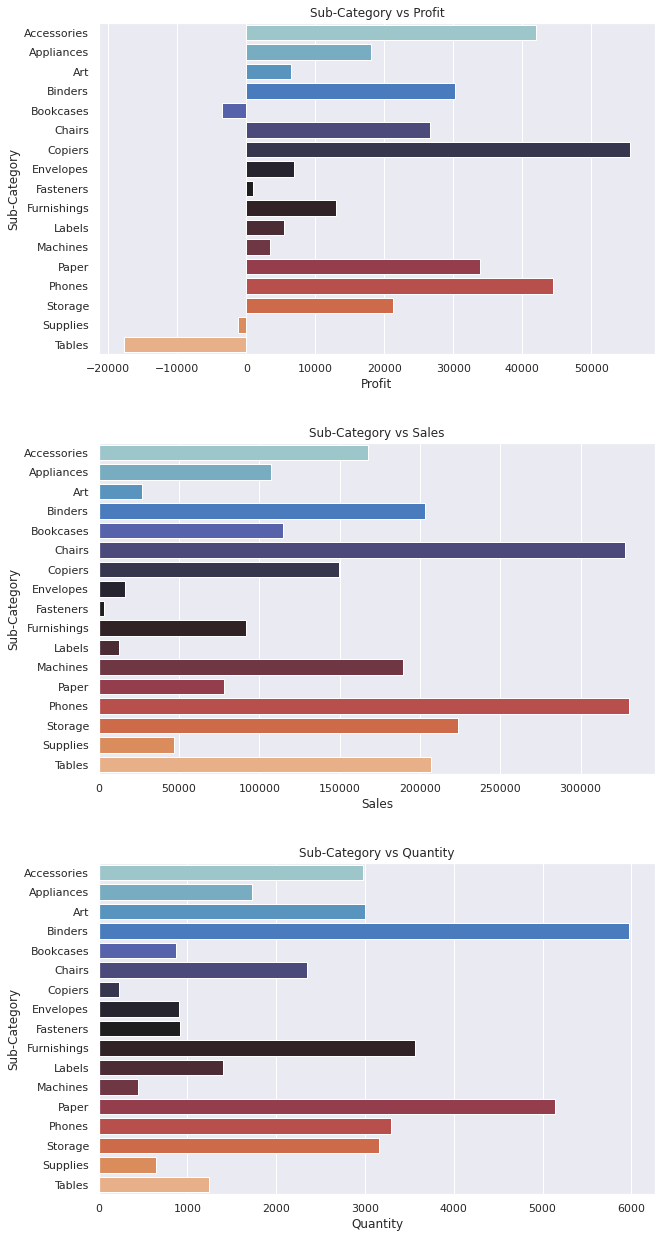

In [24]:
fig, axes = plt.subplots(3,1, figsize=(10,18))

sns.set_theme(style="darkgrid")
axes[0].set_title("Sub-Category vs Profit")
axes[1].set_title("Sub-Category vs Sales")
axes[2].set_title("Sub-Category vs Quantity")

sns.barplot(y=sub_category_df.index,
           x='Profit',
           data=sub_category_df,
           palette='icefire',
           ax=axes[0])

sns.barplot(y=sub_category_df.index,
           x='Sales',
           data=sub_category_df,
           palette='icefire',
           ax=axes[1])

sns.barplot(y=sub_category_df.index,
           x='Quantity',
           data=sub_category_df,
           palette='icefire',
           ax=axes[2])

plt.tight_layout(pad=3);

---
**Analysis:**

With analyzing these graphs, we may say that `copiers`, `accesories` and `phones` have more sales and profit.

---

## 6. Cities

In [25]:
cities_df = pd.DataFrame(df.groupby(['City'])[['Profit', 'Sales', 'Quantity']].sum().sort_values('Profit',ascending = False))
top10 = cities_df.head(10)
last10 = cities_df.tail(10)

In [26]:
high_low = top10.append(last10)

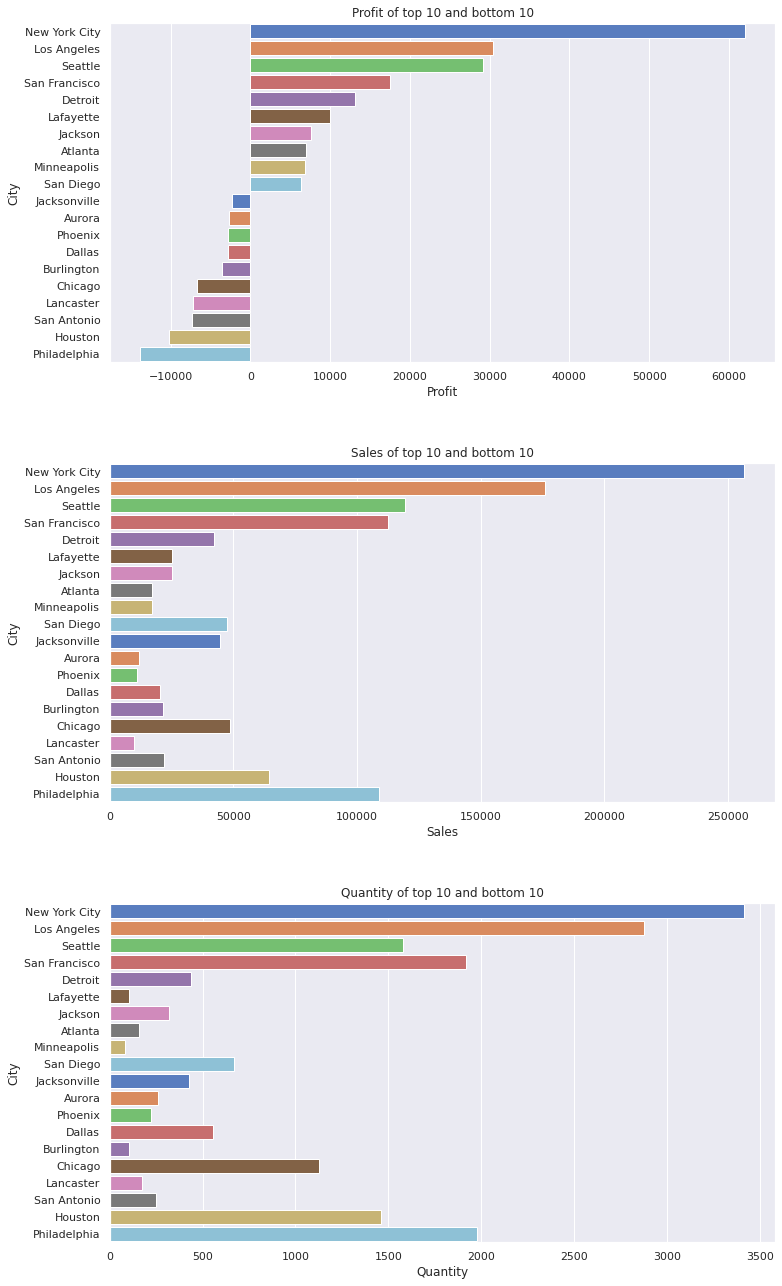

In [27]:
fig, axes = plt.subplots(3,1, figsize=(12, 19))

axes[0].set_title("Profit of top 10 and bottom 10")
axes[1].set_title("Sales of top 10 and bottom 10")
axes[2].set_title("Quantity of top 10 and bottom 10")

sns.barplot(y=high_low.index,
           x='Profit',
           data=high_low,
           palette='muted',
           ax=axes[0])

sns.barplot(y=high_low.index,
           x='Sales',
           data=high_low,
           palette='muted',
           ax=axes[1])

sns.barplot(y=high_low.index,
           x='Quantity',
           data=high_low,
           palette='muted',
           ax=axes[2])

plt.tight_layout(pad=4);

---
**Analysis:**

* `New York` have the most sales and profit.
* With a fairly high quantity and sales at `Philadelphia`, `Houston` and `Chicago`, profit at these places is in negative.
* There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the `top 10 cities`.

---

# Final Conclusions:

Consider following recommendations for higher profit:-
* Focus on category Technology like Phones as they are highest selling and most profitable. Bundle them with the less profitable products to offset the losses like tables and suppplies.
* Selling bookcases, tables and supplies result in losses, so SuperStores has to consider to bundle them together with High Selling or Profitable sub-category such as Machines, Copiers, Phones etc.
* For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so creating a Home Office Catalog with products used for offices such as paper, chairs, phone, copiers, storage,machines would result in better profits.
* Target consumer customers from East and West region of top 10 cities with most profits, with special promotions and advertisments for copiers, phones, accessories etc.

___

## Thank you :)